# Starting the Analysis
## Going Through the Data

Some csv I found on my computer. Probably a Kaggle file. Let's see what it says:

In [50]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv("AirBNB_Athens.csv")
columns = pd.array(df.columns)
print(columns)

<NumpyExtensionArray>
[                            'id',                           'name',
                        'host_id',                      'host_name',
            'neighbourhood_group',                  'neighbourhood',
                       'latitude',                      'longitude',
                      'room_type',                          'price',
                 'minimum_nights',              'number_of_reviews',
                    'last_review',              'reviews_per_month',
 'calculated_host_listings_count',               'availability_365',
          'number_of_reviews_ltm',                        'license']
Length: 18, dtype: object


### The IDs

count    1.132100e+04
mean     7.292920e+16
std      1.974165e+17
min      1.059500e+04
25%      2.448482e+07
50%      3.597136e+07
75%      5.013133e+07
max      6.510584e+17
Name: id, dtype: float64


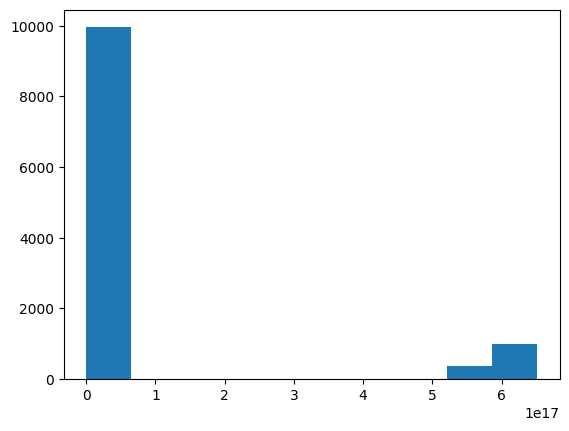

In [39]:
print(df["id"].describe())

fig, ax = plt.subplots()

ax.hist(df["id"])

plt.show()

There appears to be two different types of "ID". Let's split the dataframe for those two types.

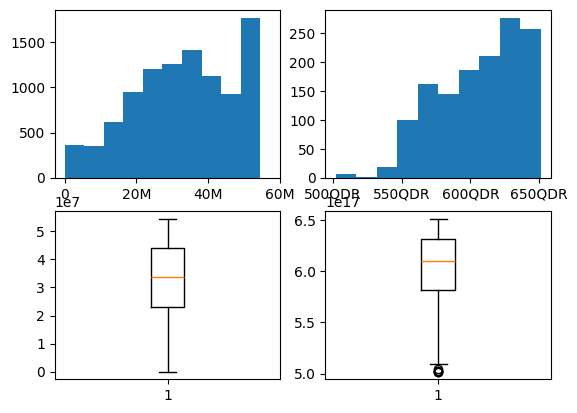

In [40]:
threshold = 10 ** 10
low_id = df[df["id"] < threshold]["id"]
high_id = df[df["id"] > threshold]["id"]

fig, axes = plt.subplots(nrows=2, ncols=2,)

axes[0, 0].hist(low_id,)
axes[0, 0].set_xticks([0, 2*10**7 , 4*10**7, 6*10**7], ["0","20M","40M","60M"])


axes[0, 1].hist(high_id)
axes[0, 1].set_xticks([5*10**17, 5.5*10**17 , 6*10**17, 6.5*10**17], ["500QDR","550QDR","600QDR","650QDR"])

axes[1, 0].boxplot(low_id)
axes[1, 1].boxplot(high_id)

plt.show()

Realistically, there are two categories of ID:
1. Smaller digit ID's (7-digit)
2. Larger Digit ID's (17-digit)

What about host_id?

count    1.132100e+04
mean     1.602636e+08
std      1.316002e+08
min      3.717700e+04
25%      4.314412e+07
50%      1.361047e+08
75%      2.433957e+08
max      4.645695e+08
Name: host_id, dtype: float64


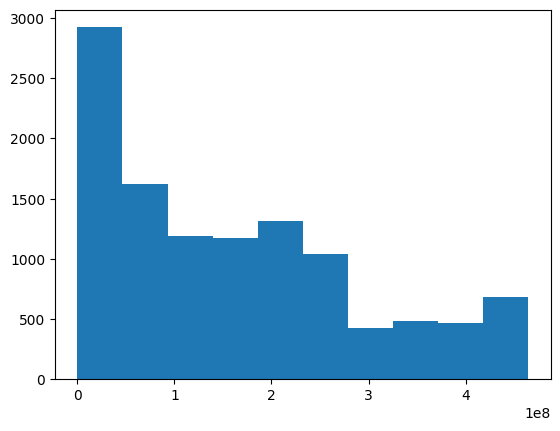

In [41]:
print(df["host_id"].describe())

fix, ax = plt.subplots()

ax.hist(df["host_id"])

plt.show()

Doesn't seem to have any major divisions

### The Coordinates
There are latitude and longitude coords given. Let's plot them:

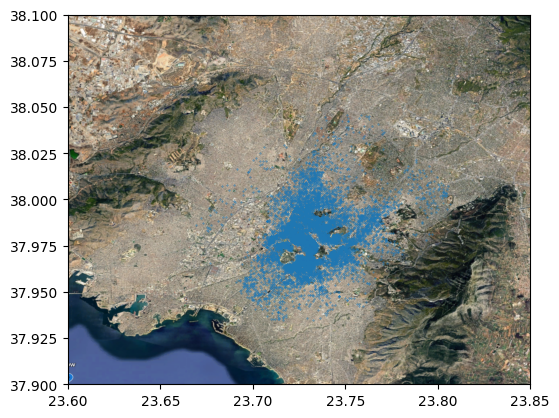

In [51]:
min_long, max_long = 23.6, 23.85
min_lat, max_lat = 37.9, 38.1
# print("Latitude Range: {} to {} North, Longitude Range: {} to {} East".format(min_lat, max_lat, min_long, max_long))
plot_image = mpl.image.imread("Athens.png")

fig, ax = plt.subplots()

ax.imshow(plot_image, extent=[min_long, max_long, min_lat, max_lat])
ax.scatter(df["longitude"], df["latitude"], s=0.1)

plt.show()

Cool

Let's see if there is any information associated with the location in the city with price.

count    8505.000000
mean       53.605761
std        19.910510
min        10.000000
25%        39.000000
50%        51.000000
75%        69.000000
max        97.000000
Name: price, dtype: float64


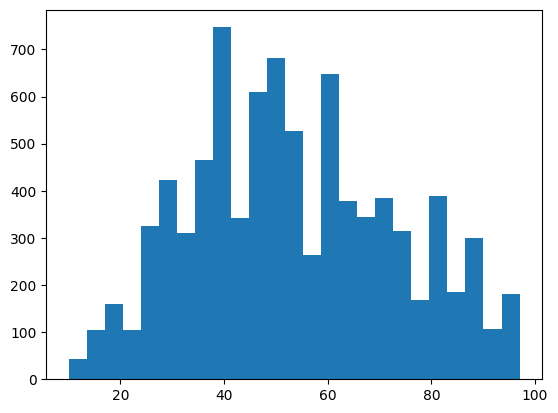

In [62]:
fig, ax = plt.subplots()
price_min = np.min(df["price"])
q1, med, q3 = np.percentile(df["price"], [25, 50, 75])
price_max = np.max(df["price"])

print(df[df["price"] <= q3]["price"].describe())

ax.hist(df[df["price"] <= q3]["price"], bins=25)

plt.show()

Looks like the bottom 75% of the prices are normally-ish distributed. I'll use their relative scores to color the values on the map

[-6.130000000000003, 13.780000000000001, 33.69, 53.6, 73.51, 93.42, 113.33000000000001]
0        black
1        black
2        black
3        black
4        black
         ...  
11316    black
11317    black
11318    black
11319    black
11320    black
Name: color, Length: 11321, dtype: object


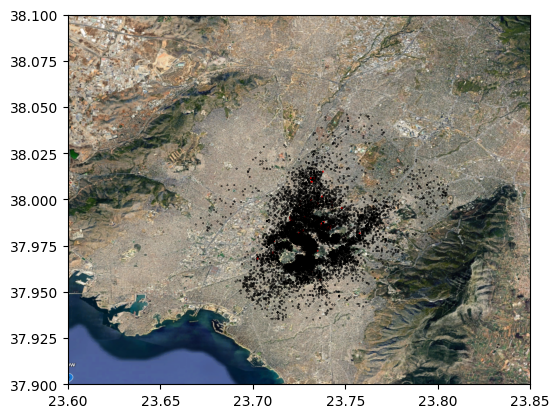

In [79]:
mean = 53.6
sd = 19.91

stdev_values = []
for i in range(7):
    stdev_values.append(sd * (i-3) + mean)
print(stdev_values)


cmap = plt.get_cmap("rainbow")
colors = cmap(np.linspace(start=1, stop=0, num=6))

def make_category(num):
    ranges = [(low, high, color) for low, high, color in zip(stdev_values[:6], stdev_values[1:7], colors)]
    for l, h, c in ranges:
        if num >= l and num <= h:
            return c
        else:
            return "black"
        
df["color"] = df["price"].apply(make_category)
print(df["color"])

fig, ax = plt.subplots()

ax.imshow(plot_image, extent=[min_long, max_long, min_lat, max_lat])
ax.scatter(df["longitude"], df["latitude"], s=0.1, c=df["color"])

plt.show()